# Clustering techniques


---

Clustering is an unsupervised machine learning approach that includes clustering data points. We may use a clustering method to categorize each data point in a specific group given a set of data points.

Below the clustering techniques implemented in this colab:


*   K-means
*   Hierarchical clustering
*   Gaussian Mixture Models
*   DBscan clustering

**Dataset**

The dataset utilized is iris dataset from scikit-learn. The dataset has 150 rows and 4 columns, namely: Sepal Length, Sepal width, Petal Length, Petal Width.



In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [ ]:
# load the iris dataset form sklearn
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
df = pd.DataFrame(X, columns = iris_data.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

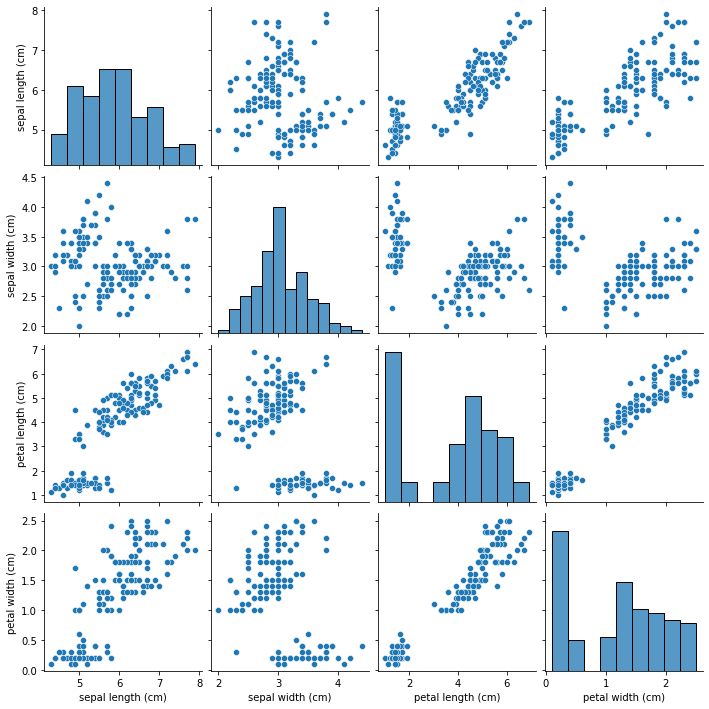

In [ ]:
sns.pairplot(df)

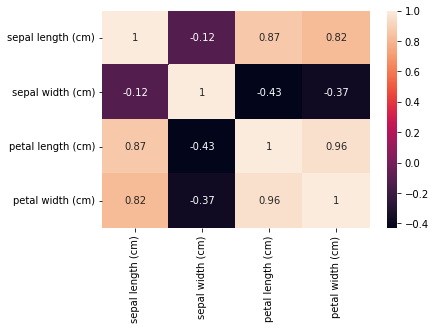

In [ ]:
sns.heatmap(df.corr().round(decimals=2), annot=True)
plt.show()

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Text(0.5, 1.0, 'sepal length vs sepal width')

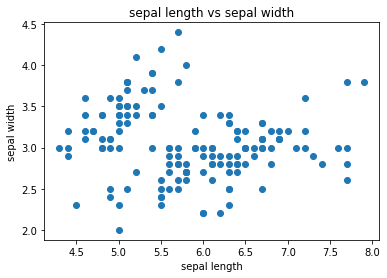

In [ ]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal length vs sepal width')

In [ ]:
df_sepal = df.iloc[:,:2]
df_sepal

sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]

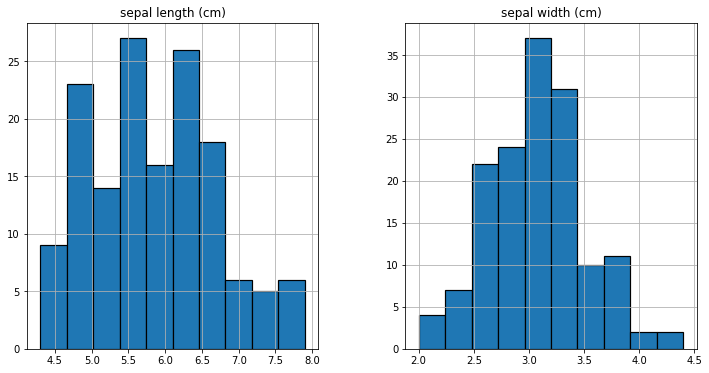

In [ ]:
df_sepal.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## Elbow method

The Elbow method is a popular technique that helps to determine the k value for the clustering algorithms. 

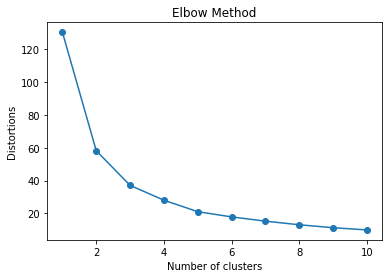

In [ ]:
from sklearn.cluster import KMeans
clustering_score = []
for i in range(1,11):
  km_cluster = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
  km_cluster.fit(df_sepal)
  clustering_score.append(km_cluster.inertia_)

plt.plot(range(1,11),clustering_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()

Here the optimal number of cluster is 3 as the elbow point is between 2 and 4.

## K-means from scratch

In [ ]:
# utility function to find distance between the centroids and data points
def distanceFromDatapoint(dp1, dp2):
    distance = sum((dp1 - dp2)**2)**0.5
    return distance

In [ ]:
# utility method for K-means clustering
def Kmeans(df_sepal, k, max_iterations = 50):
  centroids = {}
  # default value of centroids will be same as data points.
  for i in range(k):
    print(df_sepal[i])
    centroids[i] = df_sepal[i]
  clusters = {}

  for iteration in range(max_iterations):
      clusters = {}
      for class_index in range(k):
          clusters[class_index] = []
      
      # for each datapoint identify the nearest centroid and then add the datapoint to that centroid's cluster list.
      for dataPoint in df_sepal: 
          distance = []
          for centroid in centroids:
              dis = distanceFromDatapoint(dataPoint, centroids[centroid])
              distance.append(dis)
          minDis = min(distance)
          minDisIndex = distance.index(minDis)
          clusters[minDisIndex].append(dataPoint)
      
      prev_centroids = dict(centroids)
      for class_index in clusters:
          classData = clusters[class_index]
          new_centroid = np.mean(classData, axis = 0)
          centroids[class_index] = new_centroid

      found_optimal_centroids = True
      for centroid in prev_centroids:
          prev_centroid = prev_centroids[centroid]
          curr_centroid = centroids[centroid]

          if np.sum(((curr_centroid - prev_centroid)/prev_centroid) * 100) > 0.1:
              found_optimal_centroids = False
      
      if found_optimal_centroids:
          break
  return centroids, clusters


In [ ]:
sepal_data = iris_data.data[:,:2]

In [ ]:
centroids, clusters = Kmeans(sepal_data, 3, 50)

[5.1 3.5]
[4.9 3. ]
[4.7 3.2]


In [ ]:
centroids

{0: array([6.81276596, 3.07446809]),
 1: array([5.77358491, 2.69245283]),
 2: array([5.006, 3.428])}

In [ ]:
clusters

{0: [array([7. , 3.2]),
  array([6.4, 3.2]),
  array([6.9, 3.1]),
  array([6.5, 2.8]),
  array([6.3, 3.3]),
  array([6.6, 2.9]),
  array([6.7, 3.1]),
  array([6.4, 2.9]),
  array([6.6, 3. ]),
  array([6.8, 2.8]),
  array([6.7, 3. ]),
  array([6.7, 3.1]),
  array([6.3, 3.3]),
  array([7.1, 3. ]),
  array([6.3, 2.9]),
  array([6.5, 3. ]),
  array([7.6, 3. ]),
  array([7.3, 2.9]),
  array([6.7, 2.5]),
  array([7.2, 3.6]),
  array([6.5, 3.2]),
  array([6.4, 2.7]),
  array([6.8, 3. ]),
  array([6.4, 3.2]),
  array([6.5, 3. ]),
  array([7.7, 3.8]),
  array([7.7, 2.6]),
  array([6.9, 3.2]),
  array([7.7, 2.8]),
  array([6.7, 3.3]),
  array([7.2, 3.2]),
  array([6.4, 2.8]),
  array([7.2, 3. ]),
  array([7.4, 2.8]),
  array([7.9, 3.8]),
  array([6.4, 2.8]),
  array([7.7, 3. ]),
  array([6.3, 3.4]),
  array([6.4, 3.1]),
  array([6.9, 3.1]),
  array([6.7, 3.1]),
  array([6.9, 3.1]),
  array([6.8, 3.2]),
  array([6.7, 3.3]),
  array([6.7, 3. ]),
  array([6.5, 3. ]),
  array([6.2, 3.4])],
 1: [arra

[array([7. , 3.2]), array([6.4, 3.2]), array([6.9, 3.1]), array([6.5, 2.8]), array([6.3, 3.3]), array([6.6, 2.9]), array([6.7, 3.1]), array([6.4, 2.9]), array([6.6, 3. ]), array([6.8, 2.8]), array([6.7, 3. ]), array([6.7, 3.1]), array([6.3, 3.3]), array([7.1, 3. ]), array([6.3, 2.9]), array([6.5, 3. ]), array([7.6, 3. ]), array([7.3, 2.9]), array([6.7, 2.5]), array([7.2, 3.6]), array([6.5, 3.2]), array([6.4, 2.7]), array([6.8, 3. ]), array([6.4, 3.2]), array([6.5, 3. ]), array([7.7, 3.8]), array([7.7, 2.6]), array([6.9, 3.2]), array([7.7, 2.8]), array([6.7, 3.3]), array([7.2, 3.2]), array([6.4, 2.8]), array([7.2, 3. ]), array([7.4, 2.8]), array([7.9, 3.8]), array([6.4, 2.8]), array([7.7, 3. ]), array([6.3, 3.4]), array([6.4, 3.1]), array([6.9, 3.1]), array([6.7, 3.1]), array([6.9, 3.1]), array([6.8, 3.2]), array([6.7, 3.3]), array([6.7, 3. ]), array([6.5, 3. ]), array([6.2, 3.4])]
[array([5.5, 2.3]), array([5.7, 2.8]), array([4.9, 2.4]), array([5.2, 2.7]), array([5., 2.]), array([5.9, 

Text(0.5, 1.0, 'sepal length vs sepal width')

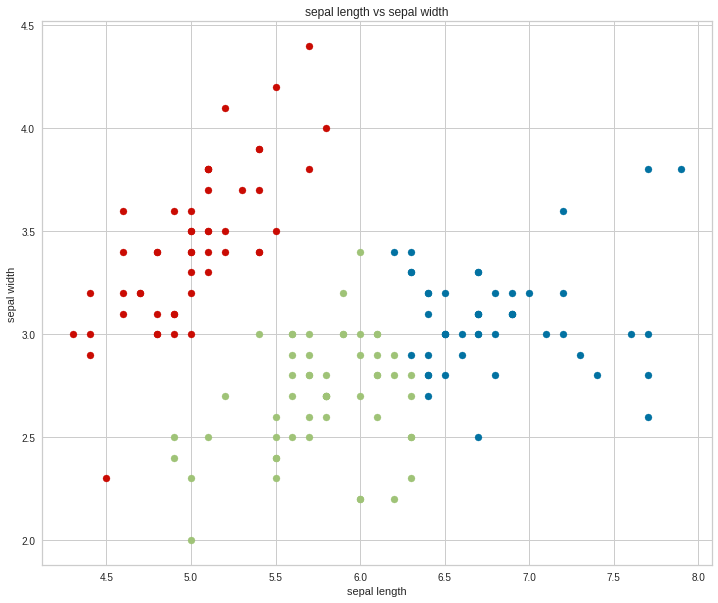

In [43]:
plt.figure( figsize=(12,10))
for index in clusters:
    print(clusters[index])
    points = clusters[index]
    plt.scatter([x[0] for x in points], [x[1] for x in points], cmap = 'cool')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal length vs sepal width')


##  Hierarchical clustering

Hierarchical clustering are of two types


*   **Agglomerative hierarchical clustering**: In this clustering, each data point is assigned to a cluster, and the closest clusters are merged in each iteration.
*   **Divisive hierarchical clustering**: In this clustering, we start with a single cluster and divide the data points into clusters in each iteration.



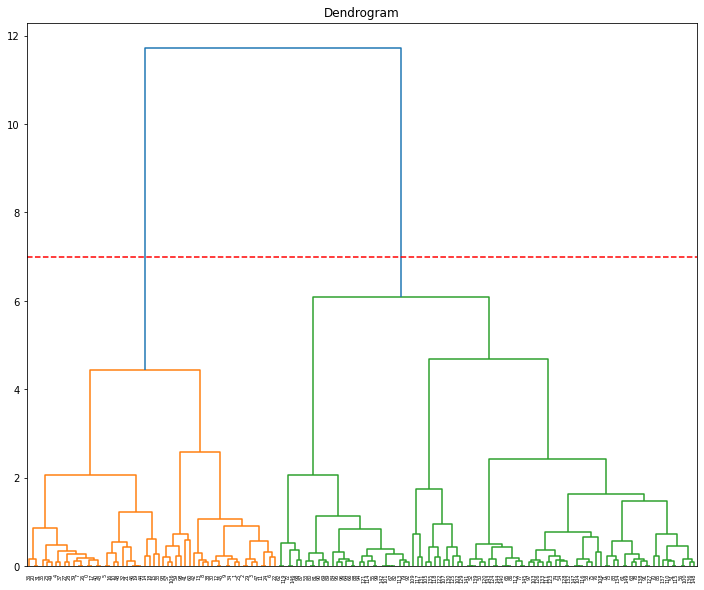

In [ ]:
# Dendrogram to identify number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 10))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df_sepal, method='ward'))
plt.axhline(y=7, color='r', linestyle='--')
plt.show()

In [ ]:
# apply agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
h_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', 
                                    linkage='complete')
h_cluster.fit_predict(df_sepal)

array([0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

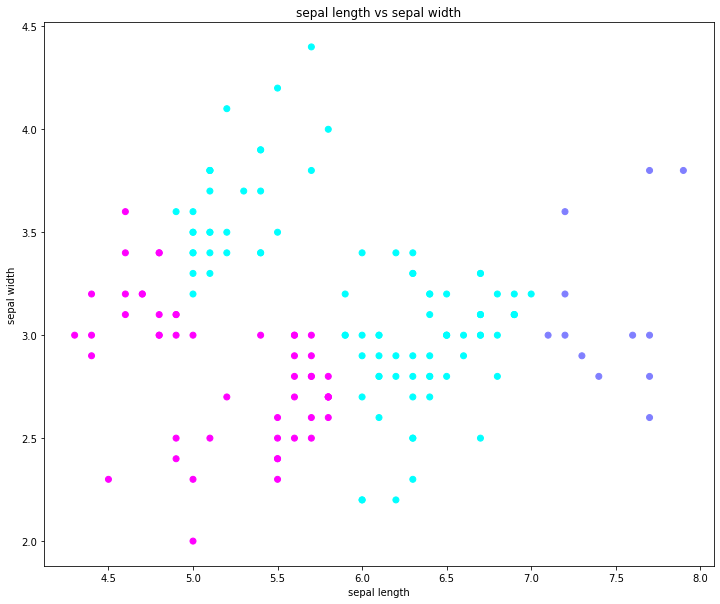

In [ ]:
# plot the datapoints in a scatter plot
plt.figure( figsize=(12,10))
plt.scatter(df_sepal['sepal length (cm)'] ,df_sepal['sepal width (cm)'], 
            c= h_cluster.labels_, cmap = 'cool')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal length vs sepal width')
plt.show()

## Gausian Mixture Models



In [ ]:
from sklearn.mixture import GaussianMixture
g_cluster = GaussianMixture(n_components = 3)
g_cluster = g_cluster.fit(df_sepal)
g_labels = g_cluster.predict(df_sepal)
print('Converged:', g_cluster.converged_)


Converged: True


Text(0.5, 1.0, 'sepal length vs sepal width')

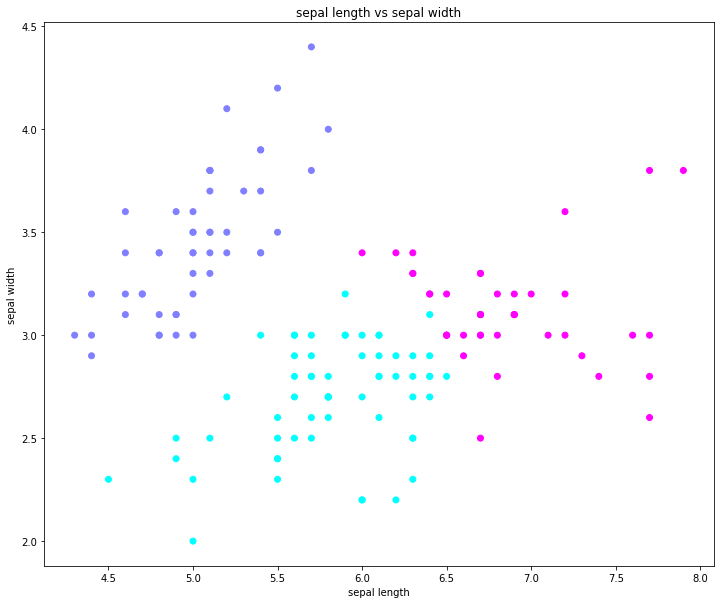

In [ ]:
plt.figure( figsize=(12,10))
plt.scatter(df_sepal['sepal length (cm)'] ,df_sepal['sepal width (cm)'], 
            c= g_labels, cmap = 'cool')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal length vs sepal width')

## DB Scan clustering

PyCaret is a state-of-art machine learning module that allows you perform various ML algorithms with less code. Simple methods like create_model, assign_model(), plot_model() would help you perform DB Scan clustering in a few lines of code.

In [ ]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.clustering import *
data = df_sepal

In [ ]:
db_cluster = setup(data = data)

Description                 Value
0                               session_id                  1303
1                            Original Data              (150, 2)
2                           Missing Values                 False
3                         Numeric Features                     2
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data              (150, 2)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  b24c
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [ ]:
dbscan_model = create_model('dbscan')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.4318            10.8064  ...           0             0

[1 rows x 6 columns]

In [ ]:
dbscan_results = assign_model(dbscan_model)
dbscan_results.head()

sepal length (cm)  sepal width (cm)    Cluster
0                5.1               3.5  Cluster 0
1                4.9               3.0  Cluster 0
2                4.7               3.2  Cluster 0
3                4.6               3.1  Cluster 0
4                5.0               3.6  Cluster 0

In [ ]:
plot_model(dbscan_model,'cluster')